<a href="https://colab.research.google.com/github/Aayush-Jain01/MNIST_Model/blob/main/Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
dataset = MNIST("data/", download=True, transform= ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


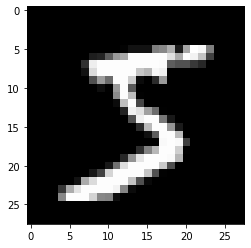

In [3]:
#plt.imshow expects an image tensor to be of type (w, h, color_channels)
image, label = dataset[0]
plt.imshow(image.squeeze(0), cmap="gray")               #pl.imshow only accepts 2d array. squeeze converts 1x28x28 to 28x28. squeeze removes the one-dimensional aspect
image.squeeze(0).shape
ex = [1, 28, 28]
trace = tf.convert_to_tensor(ex)



In [4]:
val_size = 10000
train_size = len(dataset) - val_size
train_set, val_set = random_split(dataset, [train_size, val_size])
len(train_set), len(val_set)

(50000, 10000)

In [5]:
batch_size = 128
train_loader = DataLoader(train_set, batch_size, shuffle= True, num_workers=4, pin_memory=True) 
val_loader =  DataLoader(val_set, batch_size*2, num_workers=4, pin_memory=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])


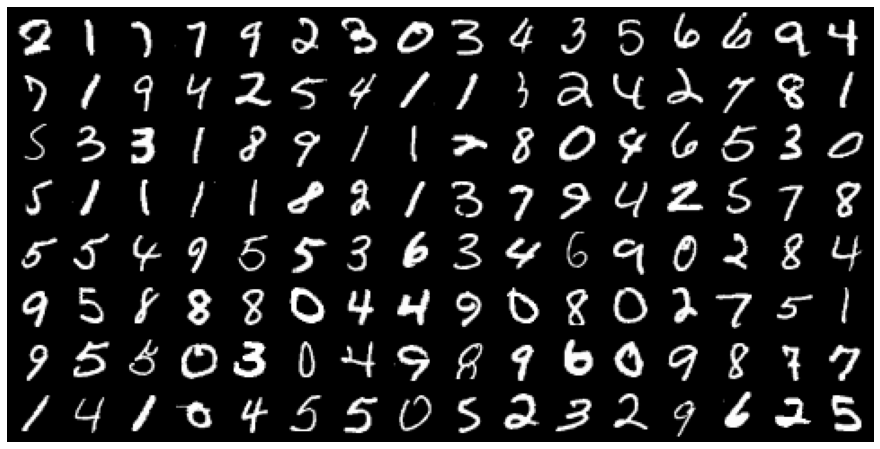

In [6]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [7]:
for images, _ in train_loader:
  input = images.reshape(-1, 784)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [8]:
hidden_size = 32
input_size = input.shape[-1]
layer1 = nn.Linear(input_size, hidden_size)

In [17]:
layer_1_outputs = layer1(input)
print(torch.min(layer_1_outputs).item())
layer_1_output_activated = F.relu(layer_1_outputs)          #The activation function is ReLU = max(x, 0).An activation function is needed in order to account for non-linear realtionships between input and output 
torch.min(layer_1_output_activated).item()                  

-0.6064534783363342


0.0

In [20]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)
layer_2_output = layer2(layer_1_output_activated)
layer_2_output.shape

torch.Size([128, 10])

In [68]:
#Model
class MNIST_MODEL(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 =  nn.Linear(hidden_size, output_size)
  def forward(self, data):  
    data = data.reshape(-1, 784)
    out1 = self.linear1(data)
    out1_activated = F.relu(out1)
    out2 = self.linear2(out1)
    return out2
  def train(self, images, labels):
    output = self(images)
    loss = F.cross_entropy(output, labels)
    return loss
  def validation_step(self, images, labels):
    output = self(images)
    loss = F.cross_entropy(output, labels)
    acc= accuracy(output, labels)
    return (loss, acc)
  

In [96]:
def accuracy(output, labels):
  #probs = F.softmax(output, dim=1)
  _, preds = torch.max(output, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(output))

In [56]:
input_size = 784
hidden_size = 32
output_size = 10
model = MNIST_MODEL(input_size, hidden_size, output_size)
for images, labels in train_loader:
  output = model(images)
  loss = F.cross_entropy(output, labels)
  print(loss)
  break



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(2.2873, grad_fn=<NllLossBackward>)


In [40]:
torch.cuda.is_available()

False

In [41]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [42]:
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [44]:
device = get_default_device()

In [45]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
cpu


In [46]:
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [47]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [99]:
def training_model(epochs, lr, train_loader, val_loader, opt_func= torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  LOSS = 0
  ACC = 0
  for epoch in range(epochs):
    loss_epoch = 0
    acc = 0
    for images, labels in train_loader:
      loss = model.train(images, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    for batch in val_loader:
      loss_epoch += model.validation_step(images, labels)[0]
      acc += model.validation_step(images, labels)[1]
    print("Epoch:", epoch, "Loss=", loss_epoch/len(val_loader), "Accuracy=", acc/len(val_loader))
    LOSS += loss/len(val_loader)
    ACC += acc/len(val_loader)
  return (LOSS/epochs, ACC/epochs)


In [71]:
model = MNIST_MODEL(input_size, hidden_size, output_size)
to_device(model, device)
training_model(5, 0.5, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0 Loss= tensor(0.2406, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)
Epoch: 1 Loss= tensor(0.3137, grad_fn=<DivBackward0>) Accuracy= tensor(0.9250)
Epoch: 2 Loss= tensor(0.1038, grad_fn=<DivBackward0>) Accuracy= tensor(0.9750)
Epoch: 3 Loss= tensor(0.0390, grad_fn=<DivBackward0>) Accuracy= tensor(1.)
Epoch: 4 Loss= tensor(0.1157, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)


(tensor(0.1157, grad_fn=<DivBackward0>), tensor(0.9625))

In [97]:
training_model(5, 0.1, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0 Loss= tensor(0.1900, grad_fn=<DivBackward0>) Accuracy= tensor(0.9125)
Epoch: 1 Loss= tensor(0.1352, grad_fn=<DivBackward0>) Accuracy= tensor(0.9750)
Epoch: 2 Loss= tensor(0.2478, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)
Epoch: 3 Loss= tensor(0.2578, grad_fn=<DivBackward0>) Accuracy= tensor(0.9250)
Epoch: 4 Loss= tensor(0.1302, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)


(tensor(0.2392, grad_fn=<DivBackward0>), tensor(37.9000))

In [100]:
training_model(10, 0.01, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0 Loss= tensor(0.1497, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)
Epoch: 1 Loss= tensor(0.1347, grad_fn=<DivBackward0>) Accuracy= tensor(0.9500)
Epoch: 2 Loss= tensor(0.2153, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)
Epoch: 3 Loss= tensor(0.6750, grad_fn=<DivBackward0>) Accuracy= tensor(0.8875)
Epoch: 4 Loss= tensor(0.2494, grad_fn=<DivBackward0>) Accuracy= tensor(0.9375)
Epoch: 5 Loss= tensor(0.2737, grad_fn=<DivBackward0>) Accuracy= tensor(0.9250)
Epoch: 6 Loss= tensor(0.1054, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)
Epoch: 7 Loss= tensor(0.1322, grad_fn=<DivBackward0>) Accuracy= tensor(0.9750)
Epoch: 8 Loss= tensor(0.2011, grad_fn=<DivBackward0>) Accuracy= tensor(0.9500)
Epoch: 9 Loss= tensor(0.1222, grad_fn=<DivBackward0>) Accuracy= tensor(0.9625)


(tensor(0.0058, grad_fn=<DivBackward0>), tensor(0.9475))

In [82]:
def predict_image(img):
  xb = img.unsqueeze(0)
  yb = model.forward(xb)
  probs = F.softmax(yb, dim=1)
  _, preds = torch.max(probs, dim=1)
  #print(preds[0])
  return preds[0].item()

In [83]:
test_dataset = MNIST("data/", train=False, transform=ToTensor())
img, label = test_dataset[16]
prediction = predict_image(img)
print("Label:", label )
print("Prediction:", prediction)

Label: 9
Prediction: 9


Prediction: 3
Label: 9
Accuracy: 1.8900000000000001
Correct= 189
Wrong= 5


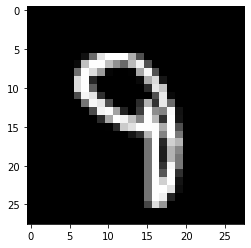

In [104]:
correct = 0
wrong = 0
for img, label in test_dataset:
  prediction = predict_image(img)
  if(prediction == label):
    correct += 1
  if(prediction != label):
    wrong += 1
  if(wrong == 5):  
    print("Prediction:", prediction)
    print("Label:", label)
    plt.imshow(np.squeeze(img), cmap='gray')
    break
print("Accuracy:", (correct/len(test_dataset))*100)
print("Correct=", correct)
print("Wrong=", wrong)